# Creating Features

In the last lesson we looked at how to identify the features with highest MI scores. In this lesson we'll go over how to develop these features.

In this lesson we'll look at the [automibile dataset](https://www.kaggle.com/toramky/automobile-dataset)

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

In [2]:
df = pd.read_csv('datasets/Automobile_data.csv')

In [3]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


## Research

From abit of research we can find formulas and domain knowledge that can help use create new features. Example we can calculate the bore stoke ration of the engine which will give use a new feature. [Formula](https://carbiketech.com/bore-stroke-ratio-theory/)

In [4]:
df.shape

(205, 26)

In [5]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [6]:
df['bore'] = pd.to_numeric(df['bore'], errors='coerce')
df['stroke'] = pd.to_numeric(df['stroke'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'], errors='coerce')

In [7]:
df['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [8]:
df['num-of-cylinders'].replace(
    {'six' : 6, 'five' : 5, 'twelve' : 12, 'eight' : 8, 'four' : 4, 'three' : 3, 'two' : 2}, inplace = True)

In [9]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders       int64
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [10]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [11]:
df.dropna(inplace = True)

In [12]:
df['boreStrokeRation'] = df.bore / df.stroke

In [13]:
df[["boreStrokeRation", "bore", "stroke"]].head()

,boreStrokeRation,bore,stroke
0,1.294776,3.47,2.68
1,1.294776,3.47,2.68
2,0.772334,2.68,3.47
3,0.938235,3.19,3.40
4,0.938235,3.19,3.40


## Engine Displacement

In [14]:
df["displacement"] = (
    np.pi * ((0.5 * df['bore']) ** 2) * df['stroke'] * df['num-of-cylinders']
)

In [15]:
df[["boreStrokeRation", "bore", "stroke", "num-of-cylinders", "displacement"]].head()

,boreStrokeRation,bore,stroke,num-of-cylinders,displacement
0,1.294776,3.47,2.68,4,101.377976
1,1.294776,3.47,2.68,4,101.377976
2,0.772334,2.68,3.47,6,117.446531
3,0.938235,3.19,3.40,4,108.695147
4,0.938235,3.19,3.40,5,135.868934


## Combining more features

We can also combine two or more feature to create a single feature.

In [16]:
df['make_and_style'] = df['make'] + "_" + df['body-style']

In [17]:
df[["make", "body-style", "make_and_style"]].head()

,make,body-style,make_and_style
0,alfa-romero,convertible,alfa-romero_convertible
1,alfa-romero,convertible,alfa-romero_convertible
2,alfa-romero,hatchback,alfa-romero_hatchback
3,audi,sedan,audi_sedan
4,audi,sedan,audi_sedan


## Finishing Thoughts

- Linear models learn sums and differences naturally, but can't learn anything more complex.

- Ratios seem to be difficult for most models to learn. Ratio combinations often lead to some easy performance gains.

- Linear models and neural nets generally do better with normalized features. Neural nets especially need features scaled to values not too far from 0. Tree-based models (like random forests and XGBoost) can sometimes benefit from normalization, but usually much less so.

- Tree models can learn to approximate almost any combination of features, but when a combination is especially important they can still benefit from having it explicitly created, especially when data is limited.

- Counts are especially helpful for tree models, since these models don't have a natural way of aggregating information across many features at once.

In [50]:
def generate_mi_scores(X, y):
    X = X.copy()
    for col in X.select_dtypes(include = ['object', 'category']):
        X[col], _ = X[col].factorize()
        
    discrete_features = [pd.api.types.is_integer_dtype(col) for col in X.columns]
    mi_scores = mutual_info_regression(X, y, discrete_features = discrete_features, random_state = 0)
    mi_scores = pd.Series(mi_scores, name = 'MI_scores', index = X.columns)
    mi_scores = mi_scores.sort_values(ascending = False)
    return mi_scores


def plot_mi_scores(mi_scores):
    mi_scores = mi_scores.sort_values(ascending=True)
    width = np.arange(len(mi_scores))
    tick_labels = list(mi_scores.index)
    plt.barh(width, mi_scores, color = 'blue')
    plt.yticks(width, tick_labels)
    plt.show()

In [51]:
X = df.copy()
y = X.pop("price")

In [52]:
mi_scores = generate_mi_scores(X, y)

In [53]:
mi_scores

curb-weight          0.922797
engine-size          0.899535
horsepower           0.887418
highway-mpg          0.857643
displacement         0.808356
city-mpg             0.777361
width                0.682215
length               0.609070
wheel-base           0.572351
bore                 0.511883
fuel-system          0.458692
boreStrokeRation     0.428174
stroke               0.389351
height               0.355436
normalized-losses    0.343632
drive-wheels         0.334628
num-of-cylinders     0.329324
make                 0.271093
make_and_style       0.264117
symboling            0.221109
peak-rpm             0.216174
compression-ratio    0.182896
engine-type          0.154138
aspiration           0.095340
body-style           0.042893
fuel-type            0.042762
num-of-doors         0.016754
engine-location      0.000000
Name: MI_scores, dtype: float64

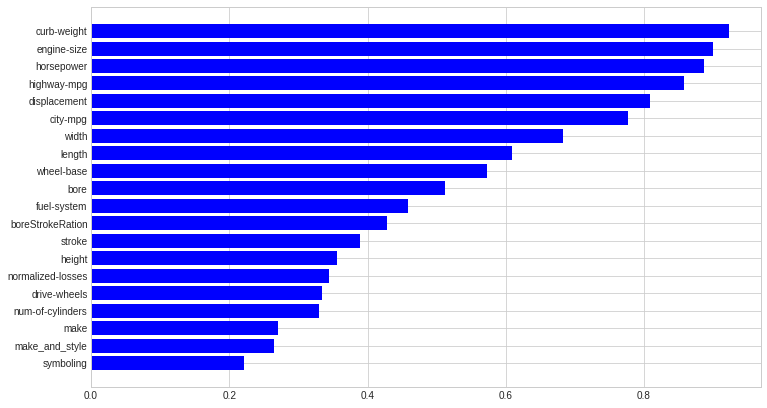

In [66]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 7))
plot_mi_scores(mi_scores.head(20))

<Figure size 864x504 with 0 Axes>

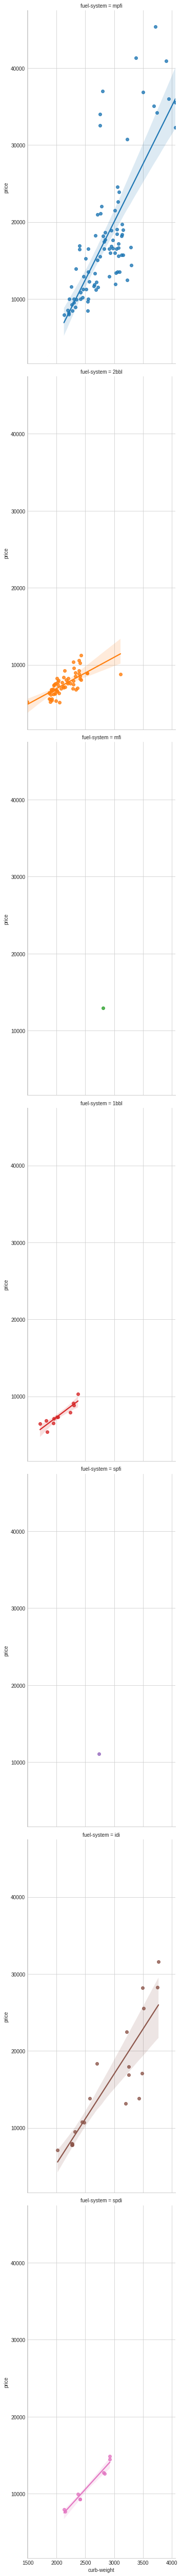

In [75]:
plt.figure(figsize = (12, 7))
sns.lmplot(x = 'curb-weight', y = 'price', 
           hue = 'fuel-system', row = 'fuel-system', data = df, height = 10, aspect = .5)
plt.show()